#Miniproyecto 1: Red Wine Quality

In [1]:
#Descarga de librerías

from os.path import basename,exists

def download(url):
  filename= basename(url)
  if not exists(filename):
    from urllib.request import urlretrieve

    local, _ = urlretrieve(url,filename)
    print("downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")


downloaded thinkstats2.py
downloaded thinkplot.py


In [2]:
#Importe de librerias y carga del archivo

import numpy as np
import pandas as pd
import thinkplot
import thinkstats2
import matplotlib.pyplot as plt


In [3]:
#Resumen del dataset

print("Resumen dataset Red Wine Quality:")
print("--------------------------------")
df = pd.read_csv("winequality-red.csv")
df.head()

Resumen dataset Red Wine Quality:
--------------------------------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Estadísticas descriptivas:

print("Estadísticas descriptivas:")
print("--------------------------")
df.describe()

Estadísticas descriptivas:
--------------------------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


###*Pregunta 1:*

In [5]:
#Utilizar métodos isnull y sum para ver cuantos datos faltantes hay en el dataframe:

print("Cantidad de nulos por columna:")
print("------------------------------")
df.isnull().sum()


Cantidad de nulos por columna:
------------------------------


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No existen datos nulos en este dataset.

In [6]:
#Corroborar si los datos de cada columna son correctos:

print("Tipo de dato por columna:")
print("-------------------------")
df.info()

Tipo de dato por columna:
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Se verifica que todas las columnas están en formato de punto flotante, con la excepción de la columna "Quality", que toma valores enteros.

###*Pregunta 2:*

In [35]:
# Cree una nueva columna llamada 'good', que tome el valor de 1 en caso de que
# la calidad del vino sea mayor o igual a 7 y que sea 0 en caso contrario:

df["good"] = df["quality"].apply(lambda x: 1 if x >= 7 else 0)
df['good'].value_counts()

good
0    1382
1     217
Name: count, dtype: int64

###*Pregunta 3:*

In [8]:
#Seccionar vinos de categoría 10:

Vinos_cat_10= df[df['quality']==10]
print("Cantidad de vinos categoría 10:")
print("-------------------------------")
print(len(Vinos_cat_10))


Cantidad de vinos categoría 10:
-------------------------------
0


En el conjunto de datos de vinos analizados, no se encuentra ningún vino categorizado con el valor de 10.

In [9]:
#Seccionar vinos de categoria 3:

vinos_cat_3= df[df['quality']==3]
print("Cantidad de vinos categoría 3:")
print("-------------------------------")
print(len(vinos_cat_3))


Cantidad de vinos categoría 3:
-------------------------------
10


Hay un total de 10 vinos que han sido clasificados en la categoría 3.

In [36]:
#Cuantos vinos son considerados buenos según la columna 'good':

print("Cantidad de vinos buenos en base a la columna good:")
print("---------------------------------------------------")
df['good'].value_counts()


Cantidad de vinos buenos en base a la columna good:
---------------------------------------------------


good
0    1382
1     217
Name: count, dtype: int64

Según lo definido en la pregunta 2 con respecto a los vinos buenos y malos, hay un total de 217 ejemplares buenos y 1382 ejemplares malos.

In [11]:
print("Porcentaje de vinos buenos en base a la columna 'good':")
print("-------------------------------------------------------")
df['good'].value_counts(normalize=True)*100

Porcentaje de vinos buenos en base a la columna 'good':
-------------------------------------------------------


good
0    86.429018
1    13.570982
Name: proportion, dtype: float64

Expresado en porcentajes, la cantidad de vinos malos representan un 86,4% y los vinos buenos solo un 13,5%.

###*Pregunta 4:*

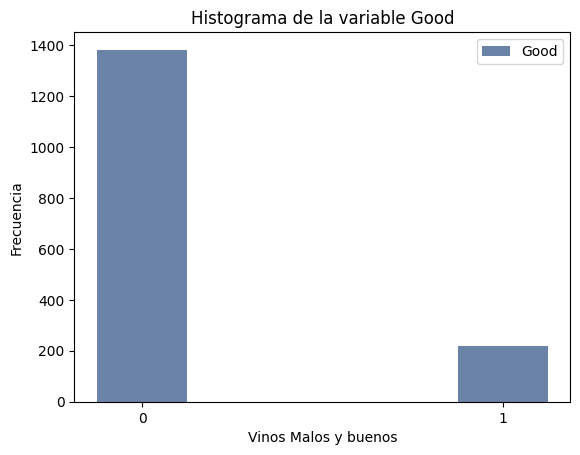

<Figure size 800x600 with 0 Axes>

In [42]:
#histograma de la variable 'good':

hist= thinkstats2.Hist(df.good,label= 'Good')
plt.xticks(range(int(min(df.good)), int(max(df.good))+1))
thinkplot.Hist(hist, width=0.25)
plt.title('Histograma de la variable Good')
thinkplot.Show(xlabel='Vinos Malos y buenos',ylabel='Frecuencia')

El gráfico muestra que predominan los vinos de mala calidad en comparación con los de buena calidad. En términos de la distribución, este histograma muestra una distribución sesgada hacia la izquierda debido a la mayor cantidad de vinos clasificados como malos en comparación con los vinos clasificados como buenos.

In [13]:
#Frecuencias de las categorías de la variable 'quality':

df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

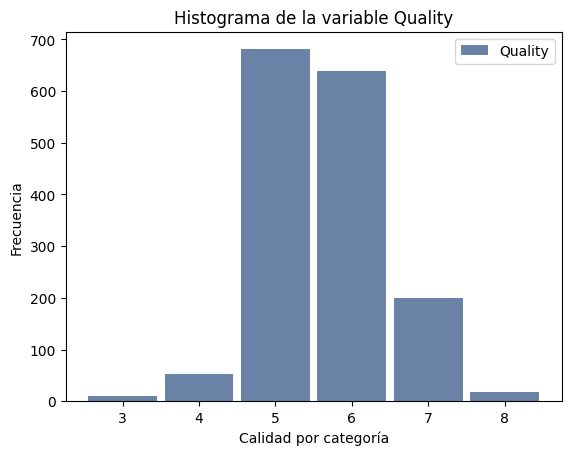

<Figure size 800x600 with 0 Axes>

In [41]:
#Histograma de la variable 'quality':

hist= thinkstats2.Hist(df.quality,label= 'Quality')
thinkplot.Hist(hist)
plt.title('Histograma de la variable Quality')
thinkplot.Show(xlabel='Calidad por categoría',ylabel='Frecuencia')

El gráfico muestra una distribución más o menos simétrica en torno a los valores de "quality" más comunes (5 y 6), con una disminución en la frecuencia hacia los extremos (3, 4, 7 y 8). Se puede observar que la mayoría de los vinos del estudio se encuentran en las categorías 5 y 6 en términos de calidad. Además, se nota que hay una cantidad menor de vinos clasificados en la categoría 7, pero esta cantidad supera a los vinos de mala calidad de las categorías 3 y 4, así como a los vinos de buena calidad de la categoría 8. No se observan vinos en las categorías 1, 2, 9 y 10, lo que sugiere que no hay vinos extremadamente malos ni extremadamente buenos en el conjunto de datos.

###*Pregunta 5:*

In [15]:
#Calcule el promedio y desviación estándar de cada columna del dataset, exceptuando la columna 'good':

nuevo_df= df
nuevo_df= nuevo_df.drop('good',axis=1)
#Se crea un dataframe auxiliar en donde se elimina la columna good


In [16]:
#Promedio de cada variable:

print("Promedio de las variables a excepción de 'good':")
print("------------------------------------------------")
promedio= nuevo_df.mean()
print(promedio)

Promedio de las variables a excepción de 'good':
------------------------------------------------
fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64


La mayoría de las variables tienen valores que están en una escala similar, excepto por "total sulfur dioxide" que tiene valores más altos en comparación con las otras variables.

Las variables "volatile acidity", "citric acid", "chlorides", "density" y "sulphates" tienen valores promedio de cero.

El valor promedio de la variable "quality" es de alrededor de 5.64, lo que sugiere que la calidad del vino se concentra en la categoría 5.

La cantidad promedio de "total sulfur dioxide" es mucho mayor que la de las otras variables, lo que podría indicar que hay una mayor variación o que la mayoría de los valores tienden a ser más altos en esta variable.

In [17]:
#Desviación estandar de cada variable:

print("Desviación estandar de las variables a excepción de 'good':")
print("-----------------------------------------------------------")
desviacion_est= nuevo_df.std()
print(desviacion_est)

Desviación estandar de las variables a excepción de 'good':
-----------------------------------------------------------
fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64


La desviación estándar de "Free Sulfur Dioxide" es de aproximadamente 10,46. Esto sugiere que esta variable tiene una variación considerable alrededor de su promedio.

Similar a la variable anterior la variable "Total Sulfur Dioxide" su desviación estándar es de aproximadamente 32.90. Esta también tiene una variación significativa alrededor de su promedio.

Se concluye que el nivel tanto de "Free Sulfur Dioxide" y "Total Sulfur Dioxide" debe ser distinto para cada vino de la muestra, esto puede ocurrir por diversas razones, el tipo de cosecha, el lugar de donde proviene la cosecha, la cantidad de azucar del vino, su nivel de exposición al oxígeno, entre otros. Esto podría explicar el alto valor que arroja tanto el promedio como la desviación estandar.

###*Pregunta 6:*

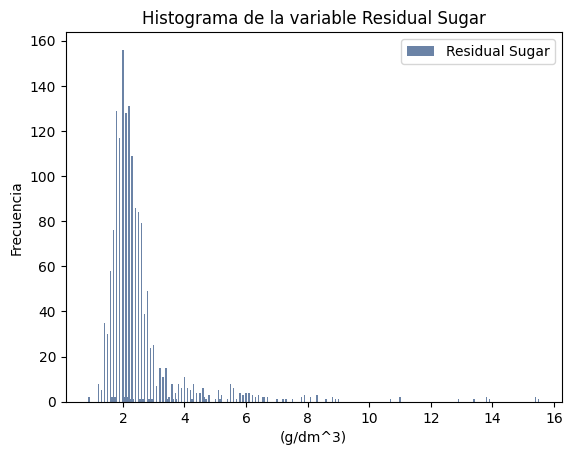

<Figure size 800x600 with 0 Axes>

In [45]:
#Grafique el histograma de la columna 'residual sugar':

sugar = df['residual sugar']
hist= thinkstats2.Hist(sugar,label= 'Residual Sugar')
thinkplot.Hist(hist)
plt.title('Histograma de la variable Residual Sugar')
thinkplot.Show(xlabel='(g/dm^3)',ylabel='Frecuencia')

In [19]:
#Luego muestre los 5 valores más grandes de dicha columna con sus frecuencias respectivas:

print("Los 5 valores más grandes y sus frecuencias de la columna 'residual sugar':")
print("--------------------------------------------------------------------------")
for sugar, freq in hist.Largest(5):
    print(sugar, freq)

Los 5 valores más grandes y sus frecuencias de la columna 'residual sugar':
--------------------------------------------------------------------------
15.5 1
15.4 2
13.9 1
13.8 2
13.4 1


Los cinco valores más grandes del conjunto de datos de 'residual sugar' son de 13,4 - 13,8 - 13,9 - 15,4 y 15,5 g/dm3.

In [20]:
#Basándose en el promedio, desviación estándar e histograma de esta columna
#comente sobre si los 5 valores más grandes de esa columna deberían ser considerados outliers o no:

print("Valores estadísticos de 'residual sugar':")
print("-------------------------------")
sugar_mean= df['residual sugar'].mean()
sugar_median= df['residual sugar'].median()
sugar_std= df['residual sugar'].std()
q1 = df['residual sugar'].quantile(0.25)
q3 = df['residual sugar'].quantile(0.75)
print("Promedio:")
print(sugar_mean)
print(" ")
print("Mediana:")
print(sugar_median)
print(" ")
print("Desviación estandar:")
print(sugar_std)
print(" ")
print("Cuartil 1:")
print(q1)
print(" ")
print("Cuartil 3:")
print(q3)



Valores estadísticos de 'residual sugar':
-------------------------------
Promedio:
2.53880550343965
 
Mediana:
2.2
 
Desviación estandar:
1.4099280595072798
 
Cuartil 1:
1.9
 
Cuartil 3:
2.6


Fórmula para calcular si existen outliers:
[𝑄1 − 𝑘(𝑄3 − 𝑄1) , 𝑄3 + 𝑘(𝑄3 − 𝑄1)] (donde normalmente k = 1,5)
Q1 y Q3 corresponden al primer y tercer quintil respectivamente.

In [21]:
#Outliers:

rango_1 = 1.9 - 1.5 * (2.6 - 1.9)
rango_2 = 2.6 + 1.5 * (2.6 - 1.9)
(rango_1, rango_2)

(0.8499999999999996, 3.6500000000000004)

El promedio de 'Sugar' da un valor de 2,53, la mediana 2,2 y la desviación estandar 1,40, esto nos señala que la mayoría de los datos están concentrados en el valor de 2 g/dm3 un valor cercano a la media, en donde además la desviación estandar nos demuestra que existe muy poca variación entre los datos.

En cuanto a los cinco valores más grandes de la muestra que van desde el 13,4 al 15,5 sí deben ser considerados outliers ya que al calcular la fórmula esta nos arroja que el rango en el que deberian estar los datos va desde el 0,85 al 3,65, y esto es significativamente menor en comparación a 15,5, por lo tanto deben considerarse como datos atípicos.


In [22]:
#Comente sobre sí los 5 valores más pequeños de 'sugar' deberían ser considerados outliers o no:

print("Los 5 valores más pequeños y su frecuencia de la columna 'residual sugar':")
print("--------------------------------------------------------------------------")
for sugar, freq in hist.Smallest(5):
    print(sugar, freq)

Los 5 valores más pequeños y su frecuencia de la columna 'residual sugar':
--------------------------------------------------------------------------
0.9 2
1.2 8
1.3 5
1.4 35
1.5 30


En cuanto a los cinco valores más pequeños tenemos desde 0,9 al 1,5 los cuales están dentro de los rangos de 0,85 a 3,65 lo que indica que son números normales dentro de la muestra de datos de 'residual sugar' por lo que no deben ser considerados como outliers.

###*Pregunta 7:*

In [23]:
#Separar entre vinos buenos y vinos malos:

print("Cantidad de vinos buenos:")
print("-------------------------")
vinos_buenos = df[df['good']==1]
vinos_buenos.value_counts().sum()


Cantidad de vinos buenos:
-------------------------


217

In [24]:
print("Cantidad de vinos malos:")
print("------------------------")
vinos_malos = df[df['good']==0]
vinos_malos.value_counts().sum()

Cantidad de vinos malos:
------------------------


1382

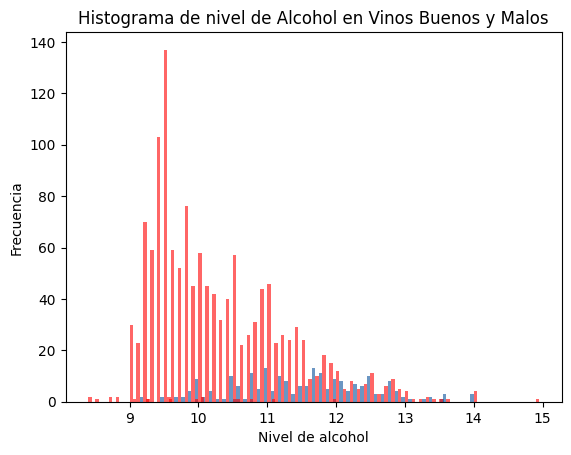

<Figure size 800x600 with 0 Axes>

In [25]:
#Grafique histogramas de la variable 'alcohol' en ambos grupos:

alcohol_buenos_hist= thinkstats2.Hist(vinos_buenos['alcohol'])
alcohol_malos_hist = thinkstats2.Hist(vinos_malos['alcohol'])

width = 0.05
thinkplot.PrePlot(2)
thinkplot.Hist(alcohol_buenos_hist, align='right', width=width)
thinkplot.Hist(alcohol_malos_hist, align='left', width=width, color='red')
plt.title('Histograma de nivel de Alcohol en Vinos Buenos y Malos')
thinkplot.Show(xlabel='Nivel de alcohol', ylabel='Frecuencia')


La combinación de ambos histogramas arroja las siguientes características:

Histograma vinos malos(barras rojas): Este muestra una variación notable. Inicialmente, la frecuencia es mínima para vinos con 8 grados de alcohol, pero se observa un pick pronunciado donde la mayoría, aproximadamente 130 unidades, poseen un contenido de alcohol entre 9 y 10 grados. Posteriormente, la frecuencia disminuye de manera gradual para aquellos con entre 10 y 11 grados, y se reduce significativamente para los vinos con 12 a 15 grados de alcohol.

Histograma vinos buenos(barras azules): La distribución comienza con una baja frecuencia a partir de los 9 grados, incrementándose de forma gradual y homogenea a lo largo de los grados siguientes. Se evidencia un ligero aumento en la frecuencia entre los 11 y 13 grados, disminuyendo suavemente hasta los 14 grados. Las frecuencias en este pick no exceden las 20 unidades, lo que indica que, aunque sean pocos, los vinos de buena calidad muestran una distribución bastante uniforme, demostrando que los vinos de mayor calidad se encuentran principalmente en el rango de 11 a 13 grados de alcohol.

Podemos concluir que los vinos considerados de buena calidad tienden a tener un mayor contenido de alcohol, entre 11 y 12 grados.

In [26]:
#Calculo de PMF

pmf_vinos_buenos = thinkstats2.Pmf(vinos_buenos["alcohol"])
pmf_vinos_malos = thinkstats2.Pmf(vinos_malos["alcohol"])

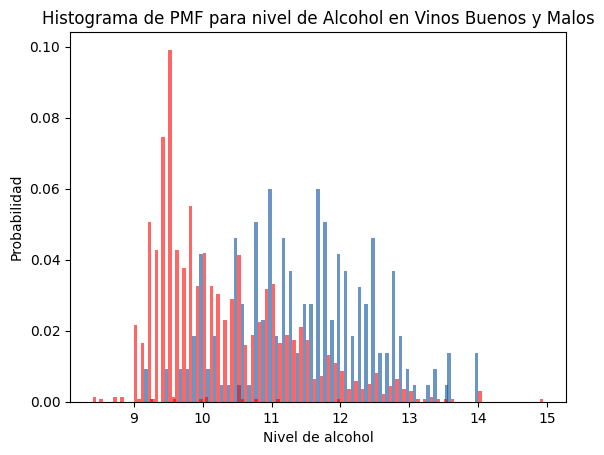

<Figure size 800x600 with 0 Axes>

In [27]:
#Gráfico PMF para nivel de alcohol en vinos buenos y malos

width = 0.05
thinkplot.PrePlot(2)
thinkplot.Hist(pmf_vinos_buenos, align='right', width=width)
thinkplot.Hist(pmf_vinos_malos, align='left', width=width, color='red')
plt.title('Histograma de PMF para nivel de Alcohol en Vinos Buenos y Malos')
thinkplot.Show(xlabel='Nivel de alcohol', ylabel='Probabilidad')

La combinación de ambos histogramas arroja las siguientes características:

PMF vinos malos(barras rojas):
la probabilidad de que los vinos clasificados como malos tengan entre 9 y 10 grados es alta de 0.1, esto significa que es más probable encontrar vinos con 9 grados de alcohol en los vinos malos. A diferencia de los vinos que presentan otros grados de alcohol, existe una probabilidad moderada que baja de 0,04 a 0,01 para los grados desde 10 a 12.
Se puede inferir que si un grado de alcohol es más común en vinos malos, puede considerarse un indicador de menor calidad, en este caso serían los vinos de grado 9.

PMF vinos buenos(barras azules):
La PMF de los vinos buenos revela que la probabilidad más alta de 0,06 se encuentra en los 11 y 12 grados de alcohol. Esto sugiere que es probable que los vinos de mejor calidad tengan este grado de alcohol. Sin embargo, también se observa una dispersión leve en la distribución, en donde los demás grados tienen una probabilidad entre 0,03 y 0,04. La concentración principal de los vinos buenos se encuentra entre los 11 y 12 grados de alcohol.

La distribución para ambos gráficos es similar la gran diferencia se nota en la elevación que tienen las barras para los vinos buenos en el gráfico de PMF pero esto se puede explicar porque la probabilidad de obtener un vino bueno de la muestra no puede ser tan baja y se concentra en 0,04 de probabilidad.

El uso de histogramas para representar los PMF de vinos buenos y malos permitió interpretar la distribución de los datos. Aunque un gráfico de barras o un gráfico de líneas podría proporcionar una ilustración más clara de las diferencias de probabilidad, en este caso considero que los histogramas fueron adecuados y suficientes para visualizar las tendencias y contrastes entre las distribuciones de vinos buenos y malos.

###*Pregunta 8:*

In [28]:
# Calcule el efecto del tamaño de Cohen de la variable 'alcohol'
# de los vinos buenos vs los vinos malos.

# Definición de la función del coeficiente de Cohen:

def CohenEffectSize(group1, group2):
  diff = group1.mean() - group2.mean()
  var1 = group1.var()
  var2 = group2.var()
  n1, n2 = len(group1), len(group2)
  pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
  d = diff / np.sqrt(pooled_var)
  return d


In [29]:
print("Coeficiente de Cohen para la variable 'alcohol' en vinos buenos y malos:")
print("-----------------------------------------------------------------------")
coef_cohen= CohenEffectSize(vinos_buenos['alcohol'],vinos_malos['alcohol'])
print(coef_cohen)

Coeficiente de Cohen para la variable 'alcohol' en vinos buenos y malos:
-----------------------------------------------------------------------
1.3013961896335744


El coeficiente de Cohen se interpreta de la siguiente manera:

Un coeficiente de Cohen de 1.3 es bastante grande, lo que sugiere que hay una gran diferencia entre los vinos buenos y vinos malos en términos del nivel de alcohol, lo cual queda demostrado con los gráficos anteriores viendo su distribución.

En conclusión esto puede significar que el nivel de alcohol es un factor importante para determinar si un vino es bueno o malo en este conjunto de datos.

###*Pregunta 9:*


In [30]:
#Probabilidad de elegir un vino bueno:

p = len(vinos_buenos) / (len(vinos_buenos) + len(vinos_malos))
print(p)
n= 10000

0.1357098186366479


In [31]:
#Definición variable aleatoria:

x=np.random.binomial(n=n, p=p, size=100000)
x

array([1316, 1310, 1363, ..., 1363, 1380, 1357])

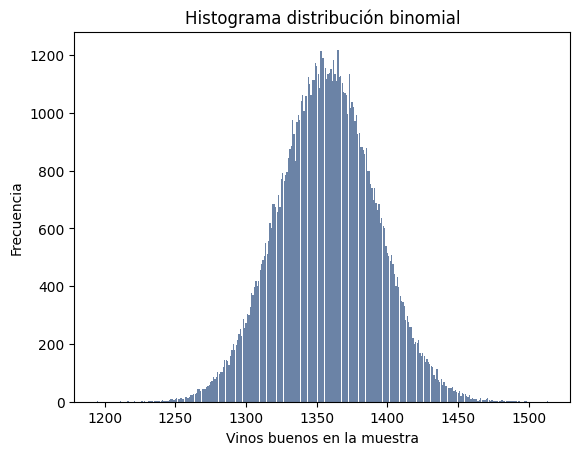

<Figure size 800x600 with 0 Axes>

In [32]:
# Graficar un histograma:

hist_binomial = thinkstats2.Hist(x)
thinkplot.Hist(hist_binomial)
plt.title("Histograma distribución binomial")
thinkplot.Show(xlabel='Vinos buenos en la muestra', ylabel='Frecuencia')


In [33]:
# Calcular el promedio de la muestra obtenida:

promedio = np.mean(x)
print('El promedio de la muestra obtenida es:', promedio)

El promedio de la muestra obtenida es: 1357.21191


In [34]:
#Promedio teórico de una distribución binomial:

n*p

1357.098186366479

El promedio de la muestra obtenida es 1357,12 esto tiene sentido ya que esperamos que la proporción de vinos buenos en una muestra aleatoria refleje de cerca la proporción observada en el conjunto de datos completo, ya que esto representa el 13% de toda la muestra al igual que en los datos del dataset original.